## Perceptron

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA

In [2]:
#Load the data sets given 
digits_training = pd.read_csv('DigitsTraining.csv', header = None, index_col = None)
digits_testing = pd.read_csv('DigitsTesting.csv', header = None, index_col = None)

In [3]:
def create_train_test(digits_training, digits_testing, id_digit, number):
    my_id_digit = digits_training[digits_training[0]==id_digit]
    my_id_digit_test = digits_testing[digits_testing[0]==id_digit]
    my_chosen_digit = digits_training[digits_training[0]==number]
    my_chosen_digit_test = digits_testing[digits_testing[0]==number]
    final_digits_train = pd.concat([my_id_digit, my_chosen_digit], ignore_index=True).sample(frac=1).reset_index(drop = True)
    final_digits_test = pd.concat([my_id_digit_test, my_chosen_digit_test], ignore_index=True).sample(frac=1).reset_index(drop = True)
    final_digits_train.to_csv('my_digits_training.csv', header = None, index = None)
    final_digits_test.to_csv('my_digits_testing.csv', header = None, index = None)
    
    X = final_digits_train.loc[:, 1:]
    Y = final_digits_train.loc[:, 0]
    X_test = final_digits_test.loc[:, 1:]
    Y_test = final_digits_test.loc[:, 0]
    
    return X, Y, X_test, Y_test

In [4]:
X, Y, X_test, Y_test = create_train_test(digits_training, digits_testing, 6, 1)

In [5]:
# This function calculates the avg_intensity for each image
def calculate_avg_intensity(X, X_test):
    avg_intensity_tr = []
    avg_intensity_tst = []
    for i in range(len(X)):
        avg_intensity_tr.append(1-np.mean(X.loc[i, :]))

    for i in range(len(X_test)):
        avg_intensity_tst.append(1-np.mean(X_test.loc[i, :]))
        
    return avg_intensity_tr, avg_intensity_tst

In [6]:
avg_intensity_tr, avg_intensity_tst = calculate_avg_intensity(X, X_test)

In [8]:
def calculate_symmetry(X, X_test):
    symmetry_tr = []
    symmetry_tst = []
    for i in range(len(X)):
        x = np.array(X.loc[i, :]).reshape(16,16)
        x_f = np.flip(x, axis=0)
        symmetry_tr.append(1-LA.norm(x_f - x))

    for i in range(len(X_test)):
        x = np.array(X_test.loc[i, :]).reshape(16,16)
        x_f = np.flip(x, axis=0)
        symmetry_tst.append(1-LA.norm(x_f - x))
        
    return symmetry_tr, symmetry_tst

In [9]:
symmetry_tr, symmetry_tst = calculate_symmetry(X, X_test)

In [10]:
my_training_data = pd.DataFrame()
my_training_data['Avg_intensity']=avg_intensity_tr
my_training_data['Symmetry']=symmetry_tr
y = [-1 if x==6 else x for x in Y]
my_training_data['label']=y
my_testing_data = pd.DataFrame()
my_testing_data['Avg_intensity']=avg_intensity_tst
my_testing_data['Symmetry']=symmetry_tst
y_test = [-1 if x==6 else x for x in Y_test]
my_testing_data['label']=y_test

In [11]:
def Perceptron(n_iter, w, number_of_params, my_training_data, my_testing_data):
    Ein = []
    Eout = []
    ein = []
    eout = []
    for iteration in range(n_iter):
        squared_error_tr = 0.0
        squared_error_tst = 0.0
        for row in range(len(my_training_data)):
            h = np.dot(my_training_data.loc[row][:number_of_params], w[1:]) + w[0]
            if h>0:
                y_pred = 1#6
            else:
                y_pred = -1
                
            error_tr = my_training_data.loc[row][-1] - y_pred
            squared_error_tr += error_tr**2
            w[0] += error_tr
            for i in range(len(my_training_data.loc[row])-1):
                w[i+1] += error_tr*my_training_data.loc[row][i]
        
        for row in range(len(my_testing_data)):
            h = np.dot(my_testing_data.loc[row][:number_of_params], w[1:]) + w[0]
            if h>0:
                y_pred = 1#6
            else:
                y_pred = -1
                
            error_tst = my_testing_data.loc[row][-1] - y_pred
            squared_error_tst += error_tst**2
        Ein.append(squared_error_tr/len(my_training_data))
        Eout.append(squared_error_tst/len(my_testing_data))
        print('>iteration=%d, >Ein: %.3f, >Eout: %.3f' % (iteration, squared_error_tr/len(my_training_data), squared_error_tst/len(my_testing_data)))
    updated_w = w
        
    return updated_w, Ein, Eout

In [14]:
#No. of iterations
n_iter = 200
#initialize weights for each dataset
w_init = [0.0 for i in range(len(my_training_data.loc[0]))]

In [15]:
PLA_weights, Ein_PLA, Eout_PLA = Perceptron(n_iter, w_init, 2, my_training_data, my_testing_data)

>iteration=0, >Ein: 0.110, >Eout: 0.258
>iteration=1, >Ein: 0.050, >Eout: 0.092
>iteration=2, >Ein: 0.036, >Eout: 0.166
>iteration=3, >Ein: 0.036, >Eout: 0.166
>iteration=4, >Ein: 0.036, >Eout: 0.166
>iteration=5, >Ein: 0.036, >Eout: 0.166
>iteration=6, >Ein: 0.036, >Eout: 0.166
>iteration=7, >Ein: 0.036, >Eout: 0.166
>iteration=8, >Ein: 0.031, >Eout: 0.111
>iteration=9, >Ein: 0.041, >Eout: 0.147
>iteration=10, >Ein: 0.036, >Eout: 0.147
>iteration=11, >Ein: 0.036, >Eout: 0.147
>iteration=12, >Ein: 0.036, >Eout: 0.138
>iteration=13, >Ein: 0.031, >Eout: 0.111
>iteration=14, >Ein: 0.031, >Eout: 0.092
>iteration=15, >Ein: 0.029, >Eout: 0.138
>iteration=16, >Ein: 0.024, >Eout: 0.138
>iteration=17, >Ein: 0.024, >Eout: 0.138
>iteration=18, >Ein: 0.024, >Eout: 0.138
>iteration=19, >Ein: 0.024, >Eout: 0.138
>iteration=20, >Ein: 0.024, >Eout: 0.138
>iteration=21, >Ein: 0.024, >Eout: 0.138
>iteration=22, >Ein: 0.024, >Eout: 0.138
>iteration=23, >Ein: 0.024, >Eout: 0.129
>iteration=24, >Ein: 0.036

In [16]:
def get_accuracy(w, number_of_params, my_training_data, my_testing_data):
    acc_in = []
    acc_out = []

    for row in range(len(my_training_data)):
        h = np.dot(my_training_data.loc[row][:number_of_params], w[1:]) + w[0]
        if h>0:
            y_pred = 1#6
            if y_pred==my_training_data.loc[row][-1]:
                acc_in.append(1)
            else:
                acc_in.append(0)
        else:
            y_pred = -1
            if y_pred==my_training_data.loc[row][-1]:
                acc_in.append(1)
            else:
                acc_in.append(0)
        
    for row in range(len(my_testing_data)):
        h = np.dot(my_testing_data.loc[row][:number_of_params], w[1:]) + w[0]
        if h>0:
            y_pred = 1#6
            if y_pred==my_testing_data.loc[row][-1]:
                acc_out.append(1)
            else:
                acc_out.append(0)
        else:
            y_pred = -1
            if y_pred==my_testing_data.loc[row][-1]:
                acc_out.append(1)
            else:
                acc_out.append(0)

    training_acc = sum(acc_in)/len(my_training_data)
    testing_acc = sum(acc_out)/len(my_testing_data)

    return training_acc, testing_acc

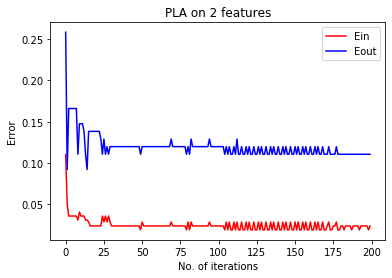

In [18]:
def plot_Error(Ein, Eout):
    plt.plot(Ein, 'r', Eout, 'b')
    plt.title('PLA on 2 features')
    plt.xlabel('No. of iterations')
    plt.ylabel('Error')
    plt.legend(['Ein','Eout'])
    plt.show()
    
plot_Error(Ein_PLA, Eout_PLA)

In [19]:
train_acc, test_acc = get_accuracy(PLA_weights, 2, my_training_data, my_testing_data)
print('Training accuracy is : {}'.format(train_acc*100))
print('Testing accuracy is : {}'.format(test_acc*100))

Training accuracy is : 99.70041941282204
Testing accuracy is : 97.23502304147466


## Perceptron with Pocket

In [20]:
def Perceptron_with_pocket(n_iter, w, number_of_params, my_training_data, my_testing_data):
    pocket = pd.DataFrame()
    Ein_p = []
    Eout_p = []
    Ein = []
    Eout = []
    idx =[]
    for iteration in range(n_iter):
        squared_error_tr = 0.0
        squared_error_tst = 0.0
        for row in range(len(my_training_data)):
            h = np.dot(my_training_data.loc[row][:number_of_params], w[1:]) + w[0]
            if h>0:
                y_pred = 1
            else:
                y_pred = -1
                
            error_tr = my_training_data.loc[row][-1] - y_pred
            squared_error_tr += error_tr**2
            w[0] += error_tr
            for i in range(len(my_training_data.loc[row])-1):
                w[i+1] += error_tr*my_training_data.loc[row][i]
        

        for row in range(len(my_testing_data)):
            h = np.dot(my_testing_data.loc[row][:number_of_params], w[1:]) + w[0]
            if h>0:
                y_pred = 1
            else:
                y_pred = -1
            error_tst = my_testing_data.loc[row][-1] - y_pred
            squared_error_tst += error_tst**2
        
        Ein.append(squared_error_tr/len(my_training_data))
        Eout.append(squared_error_tst/len(my_testing_data))
        
        if iteration==0:
            Ein_p.append(squared_error_tr/len(my_training_data))
            Eout_p.append(squared_error_tst/len(my_testing_data))
            comp = squared_error_tr
            comp1 = squared_error_tst
            
        if squared_error_tr<comp:
            print('Weight saved at iteration: ',iteration)
            idx.append(iteration)
            pocket[iteration] = w
            Ein_p.append(squared_error_tr/len(my_training_data))
            Eout_p.append(squared_error_tst/len(my_testing_data))
            comp = squared_error_tr
            
        print('>iteration=%d, >Ein: %.3f, >Eout: %.3f' % (iteration, squared_error_tr/len(my_training_data), squared_error_tst/len(my_testing_data)))
    
    updated_w = w    
    return updated_w, pocket[idx[-1]].tolist(), Ein, Eout, Ein_p, Eout_p

In [21]:
w_init = [0.0 for i in range(len(my_training_data.loc[0]))]

In [22]:
PLA_w2, pocket_weights, Ein_pla, Eout_pla, Ein_pocket, Eout_pocket = Perceptron_with_pocket(n_iter, w_init, 2, my_training_data, my_testing_data)

>iteration=0, >Ein: 0.110, >Eout: 0.258
Weight saved at iteration:  1
>iteration=1, >Ein: 0.050, >Eout: 0.092
Weight saved at iteration:  2
>iteration=2, >Ein: 0.036, >Eout: 0.166
>iteration=3, >Ein: 0.036, >Eout: 0.166
>iteration=4, >Ein: 0.036, >Eout: 0.166
>iteration=5, >Ein: 0.036, >Eout: 0.166
>iteration=6, >Ein: 0.036, >Eout: 0.166
>iteration=7, >Ein: 0.036, >Eout: 0.166
Weight saved at iteration:  8
>iteration=8, >Ein: 0.031, >Eout: 0.111
>iteration=9, >Ein: 0.041, >Eout: 0.147
>iteration=10, >Ein: 0.036, >Eout: 0.147
>iteration=11, >Ein: 0.036, >Eout: 0.147
>iteration=12, >Ein: 0.036, >Eout: 0.138
>iteration=13, >Ein: 0.031, >Eout: 0.111
>iteration=14, >Ein: 0.031, >Eout: 0.092
Weight saved at iteration:  15
>iteration=15, >Ein: 0.029, >Eout: 0.138
Weight saved at iteration:  16
>iteration=16, >Ein: 0.024, >Eout: 0.138
>iteration=17, >Ein: 0.024, >Eout: 0.138
>iteration=18, >Ein: 0.024, >Eout: 0.138
>iteration=19, >Ein: 0.024, >Eout: 0.138
>iteration=20, >Ein: 0.024, >Eout: 0.1

In [26]:
train_acc_without_pocket, test_acc_without_pocket = get_accuracy(PLA_w2, 2, my_training_data, my_testing_data)
train_acc_with_pocket, test_acc_with_pocket = get_accuracy(pocket_weights, 2, my_training_data, my_testing_data)
print('Training accuracy without PLA is : {}'.format(train_acc_without_pocket*100))
print('Testing accuracy without PLA is : {}'.format(test_acc_without_pocket*100))
print('Training accuracy with pocket is : {}'.format(train_acc_with_pocket*100))
print('Testing accuracy with pocket is : {}'.format(test_acc_with_pocket*100))

Training accuracy without PLA is : 99.70041941282204
Testing accuracy without PLA is : 97.23502304147466
Training accuracy with pocket is : 99.58058717795086
Testing accuracy with pocket is : 97.23502304147466


In [23]:
def plot_pocket_error(Ein, Eout, n_iter):
    if len(Ein)<n_iter:
        for i in range(n_iter-len(Ein)):
            Ein.append(Ein[-1])

    if len(Eout)<n_iter:
        for i in range(n_iter-len(Eout)):
            Eout.append(Eout[-1])
    plt.plot(Ein, 'r', Eout, 'b')
    plt.xlabel('No. of iterations')
    plt.ylabel('Error')
    plt.legend(['Ein','Eout'])
    plt.show()

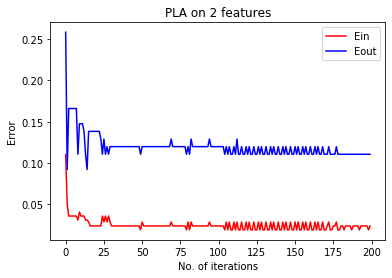

In [27]:
plot_Error(Ein_pla, Eout_pla)

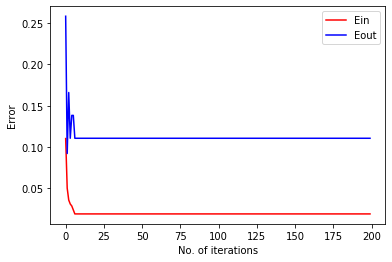

In [28]:
plot_pocket_error(Ein_pocket, Eout_pocket, n_iter)

In [29]:
def Set_Colors_Array(true_labels):
    col = [None]*len(true_labels)
    for i in range(len(col)):
        if true_labels[i] == 1:
            col[i] = 'r'
        else:
            col[i] = 'g'
    return col

In [30]:
def plot_point_and_hypothesis(data, PLA_weights):
    colors = Set_Colors_Array(data['label'])
    x_1 = data['Avg_intensity']
    x_2 = data['Symmetry']
    y = (-PLA_weights[0]-PLA_weights[1]*x_1)/PLA_weights[2]
    plt.plot(x_1,y)
    plt.scatter(x_1,x_2,c=colors)
    plt.xlabel('Avg_intensity')
    plt.ylabel('Symmetry')
    plt.show()

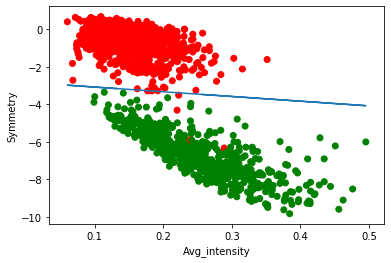

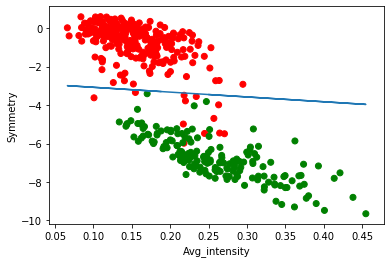

(None, None)

In [31]:
plot_point_and_hypothesis(my_training_data, PLA_w2), plot_point_and_hypothesis(my_testing_data, PLA_w2)

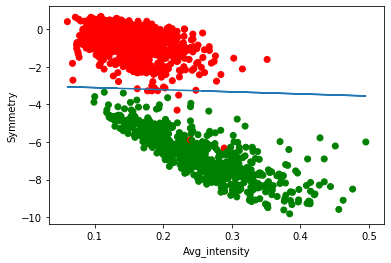

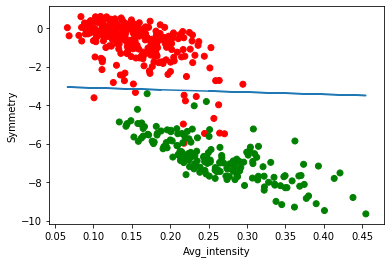

(None, None)

In [32]:
plot_point_and_hypothesis(my_training_data, pocket_weights), plot_point_and_hypothesis(my_testing_data, pocket_weights)